In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns; sns.set()

# Mixture Models & EM

## Maximum Likelihood for a Mixture of Gaussians.

The generative process with a $K$-component mixture:
- The parameters $ \theta _k $ for each component are fixed
- Draw $ z  \sim [ \pi _1, \ldots, \pi _K ] $
- Given $ z = k $, draw $ x _n \sim p(x| z  ; \theta _k  ) $ 

The entire generative model can be given as
\begin{equation}
p(x, z; \pi, \theta ) = p( z; \pi ) p( x| z; \theta _z ).
\end{equation} 

Graphical representation of a mixture model.

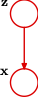
(Bishop Figure 9.4)



In [2]:
def draw_samples(N):
    pi = np.array([0.2, 0.3, 0.5])
    mu = np.array([[0.2, 0.5], [0.5, 0.6], [0.9, 0.8]])
    Sigma = np.array([[[.01, 0], [0, .01]], [[.01, 0], [0, .01]], [[.01, 0], [0, .01]]])

    samples = []
    components = []
    for n in range(N):
      component = np.random.choice(np.arange(3), p=pi)
      components.append(component)
      mean = mu[component]
      cov = Sigma[component]
      samples.extend(np.random.multivariate_normal(mean, cov, 1))

    samples = np.vstack(samples)
    plt.scatter(samples[:,0], samples[:,1], c=components, cmap = 'viridis', s=15)

    return components, samples

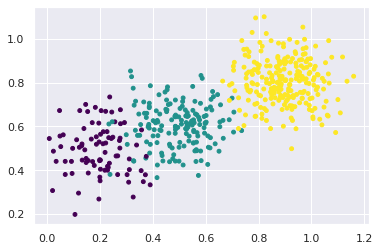

In [3]:
components, samples = draw_samples(500)

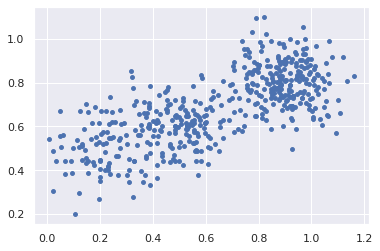

In [4]:
plt.scatter(samples[:,0], samples[:,1], s=15)
plt.show()

**Activity.** [Mackay Exercise 22.5] A random variable $x$ is assumed to have a probability distribution that is a mixture of two Gaussians,
$$p(x| \mu_1, \mu_2, \sigma) = \sum_{k=1}^2 \pi_k \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu_k)^2}{2 \sigma^2}}.$$
The prior probability of the class label $k$ is $\{\pi_1=1/2, \pi_2=1/2\}$. Note that we have the same standard deviation $\sigma$ for both Gaussians.

Assuming $\mu_k$'s and $\sigma$ are known, show that the posterior probability of the class label $k_n$ of the $n$th point can be written as
\begin{equation}\begin{aligned}
p(k_n = 1| x_n, \mu_1, \mu_2, \sigma) &= \frac{1}{1+ e^{-(w_1 x_n + w_0)}}, \\
p(k_n = 2| x_n, \mu_1, \mu_2, \sigma) &= \frac{1}{1+ e^{+(w_1 x_n + w_0)}},
\end{aligned}\end{equation}
and give expressions for $w_1$ and $w_2$.

Graphical representation of a Gaussian mixture model of a set of $N$ i.i.d. samples $\mathbf{x}_{1:N}$.

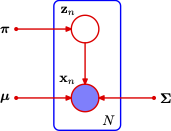
(Bishop Figure 9.6)

**The observed log-likelihood.** The (observed) log-likelihood of a mixture model with $ \pi, \theta $ for $ \mathbf{x} _{ 1:N } $ becomes
\begin{equation}
l( \pi, \theta ) = \log \prod _{ n = 1 } ^N \sum _{ k = 1 } ^K \pi _k p(\mathbf{x}  _n ; \theta  _k ) = \sum_{n = 1}^N \log \sum _{ k = 1 } ^K \pi _k p(\mathbf{x}  _n ; \theta  _k ). 
\end{equation} 
For a mixture of Gaussians, we have
\begin{equation}
l( \boldsymbol{\pi}, \boldsymbol{ \mu }, \Sigma ) = \sum _{ n = 1 } ^N \log \sum _{ k = 1 } ^K \pi _k \mathcal{ N } (\mathbf{x} _n |\boldsymbol{ \mu} _k, \Sigma _k ).
\end{equation} 

**The complete log-likelihood.** The complete log-likelihood of a mixture model with $ \pi, \theta $ for $ \mathbf{x} _{ 1:N } $ becomes
\begin{equation} 
l _c ( \theta ) \overset{\text{def}}{=}  \log p( \mathbf{x}  _{ 1:N } , \mathbf{z}  _{ 1:N } | \theta ) = \log \prod _{ n = 1 } ^N p(\mathbf{x} _n, \mathbf{z}  _n | \theta )
= \sum  _{ n = 1 } ^N \log p ( \mathbf{x}  _n, \mathbf{z}  _n  | \theta ) .
\end{equation} 
In case of a mixture of Gaussians, we have
\begin{equation}
p( \mathbf{z}  _n | \theta ) = \prod _{ k = 1 } ^K \pi _k ^{ z _{ nk } } ,
\end{equation} 
and
\begin{equation}
p( \mathbf{x}  _n | \mathbf{z}  _n, \theta ) = \prod _{ k = 1 } ^K \mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _k, \Sigma _k ) ^{ z _{ nk } } .
\end{equation} 


**Activity.** Show that
\begin{equation}
p( \mathbf{z}  _n | \theta ) = \prod _{ k = 1 } ^K \pi _k ^{ z _{ nk } } ,
\end{equation} 
and
\begin{equation}
p( \mathbf{x}  _n | \mathbf{z}  _n, \theta ) = \prod _{ k = 1 } ^K \mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _k, \Sigma _k ) ^{ z _{ nk } } .
\end{equation} 
$\square$

Combining these, we get
\begin{equation}\begin{aligned}
p( \mathbf{x}  _n , \mathbf{z} _n | \theta ) &= p( \mathbf{x}  _n | \mathbf{z}  _n, \theta ) p( \mathbf{z}  _n | \theta ) \\
&= \prod _{ k = 1 } ^K [ \pi _k \mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _k, \Sigma _k ) ] ^{ z _{ nk } },
\end{aligned}\end{equation} 
and the complete log-likelihood becomes
\begin{equation}\begin{aligned}
l _c ( \boldsymbol{\pi}, \boldsymbol{ \mu }, \Sigma  ) &= \sum  _{ n = 1 } ^N \sum _{ k = 1 } ^K \log \left\{  \pi _k \mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _k, \Sigma _k ) \right\}  ^{ z _{ nk } } \\
&= \sum  _{ n = 1 } ^N \underbrace{ \sum _{ k = 1 } ^K z _{ nk } \left\{  \log \pi _k + \log \mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _k, \Sigma _k ) \right\}. }_{\textrm{only $1$ of $K$ terms survives.}}
\end{aligned}\end{equation} 

Graphical representation of a Gaussian mixture model of a set of $N$ i.i.d. samples $(\mathbf{x}_{1:N}, \mathbf{z}_{1:N})$.

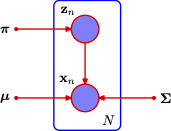
(Bishop Figure 9.9)

### EM algorithm
**EM in general.**

Given a joint distribution $ p( \mathbf{x} _{ 1:N }, \mathbf{z} _{ 1:N } | \theta ) $ over observed variables $\mathbf{x} _{ 1:N } $ and latent variables $ \mathbf{z} _{ 1:N } $, governed by parameters $\theta$, the goal is to maximize the likelihood function $ p( \mathbf{x} _{ 1:N } | \theta ) $ with respect to $\theta$.
1. Choose an initial setting for the parameters $ \theta ^{ \textrm{old}} $.
2. **E step:** Evaluate $ p( \mathbf{z} _{ 1:N } | \mathbf{x} _{ 1:N } , \theta ^{ \textrm{old}}) $.
3. **M step:** Evaluate $ \theta ^{ \textrm{new}} $ given by
\begin{equation}
\theta ^{ \textrm{new}} = \arg \max _{ \theta } \mathcal{ Q}( \theta, \theta ^{ \textrm{old}})  
\end{equation}
where
\begin{equation}
\mathcal{ Q}( \theta, \theta ^{ \textrm{old}}) = \sum _{ \mathbf{z} _{ 1:N } } p( \mathbf{z} _{ 1:N } | \mathbf{x} _{ 1:N }, \theta ^{ \textrm{old}}) \log p( \mathbf{x} _{ 1:N }, \mathbf{z} _{ 1:N } | \theta ).
\end{equation} 
4. Check for convergence of either the log-likelihood or the parameter values. If the convergence criterion is not satisfied, then let
$\theta ^{ \textrm{old}} \leftarrow \theta ^{ \textrm{new}}$ 
and return to step 2. 

**EM for a mixture of Gaussians.** 

**E step:** Taking the expectation of the complete log-likelihood with respect to the posterior over $\mathbf{z}$, we have
\begin{equation}
\mathbb{E}  [l _c ( \theta ) ] =   \sum _{ n = 1 } ^N \sum _{ k = 1 } ^K \gamma (z _{ nk })  \left( \log \pi _k + \log \mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _k, \Sigma _k ) \right)
\end{equation} 
where
\begin{equation}\begin{aligned} 
\gamma (z _{ nk } ) \overset{\text{def}}{=} \mathbb{E}   \left[z _{ nk } \right]  &= \sum _{ \mathbf{z}  _{ n } } z _{ nk } p( \mathbf{z}  _n | \mathbf{x}  _n, \theta ^{ (t) } ) \\
&= \frac{ \pi _k^{ (t) } \mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _k^{ (t) }, \Sigma _k^{ (t) } )  }{ \sum _{ j = 1 } ^K   \pi _j ^{ (t) }\mathcal{N} ( \mathbf{x}  _n | \boldsymbol{\mu} _j^{ (t) }, \Sigma _j^{ (t) } ) }.
\end{aligned}\end{equation} 
**M step:** 
\begin{equation}\begin{aligned} 
\pi _k ^{ (t + 1) }  &= \frac{ N _k }{ N }  \\
\mu _k ^{ (t + 1 ) } &= \frac{ 1 }{ N _k } \sum _{ n = 1 } ^N \gamma (z _{ nk } ) \mathbf{x}  _n \\
\Sigma _k ^{ ( t + 1 ) } &= \frac{ 1 }{ N _k } \sum _{ n = 1 } ^N \gamma (z _{ nk } ) ( \mathbf{x}  _n - \boldsymbol{\mu} _k ) ( \mathbf{x}  _n - \boldsymbol{\mu} _k ) ^T 
\end{aligned}\end{equation} 
where 
\begin{equation}
N _k = \sum _{ n = 1 } ^N \gamma ( z _{ nk } ).
\end{equation}



In [5]:
class EM_GMM(object):
  '''
  Expectation Maximization Algorithm for GMM
    K - number of clusters
    samples - observed values: N x D dimension
  '''
  def __init__(self, K, debug=False):
    self.K = K  # number of components
    self.debug = debug
    
  def _generate_initial_params(self, samples):
    self.N, self.D = samples.shape
    p = np.random.rand(self.K, 1)
    A = np.random.randn(self.D, self.D)
    # need to make A positive semidefinite
    self.params = {'pi': p/sum(p),
                   'mu': np.random.rand(self.K, 1, self.D).squeeze(),
                   'Sigma': np.stack([np.dot(A, A.transpose())
                                     for k in range(self.K)])}

  def _e_step(self, samples):
    # normal density in the numerator of gamma
    normal_density = np.vstack(
        [multivariate_normal.pdf(samples,
                                 self.params['mu'][k],
                                 self.params['Sigma'][k]) 
        for k in range(self.K)])
    if self.debug:
      print('samples:', samples, samples.shape)
      print('normal density of samples for each k:', normal_density, normal_density.shape)
      print('pi:', self.params['pi'], self.params['pi'].shape)
      print('sanity check for pi:', np.sum(self.params['pi']))

    # numerator of gamma - likelihood
    lik = self.params['pi'] * normal_density

    # observed log-likelihood
    log_lik = np.sum(np.log(np.sum(lik, axis=0)))
    if self.debug:
      print('observed log-likelihood:', log_lik)

    # gamma - responsibility matrix (K, N)
    self.gamma = lik / np.sum(lik, axis=0)
    if self.debug:
      print('gamma', self.gamma, self.gamma.shape)
      print('sanity check for gamma:', np.sum(self.gamma, axis=0))

    return log_lik

  def _m_step(self):
    # effective number of samples for each category
    N_k = np.sum(self.gamma, axis=1).reshape(self.K, -1)

    # update pi
    self.params['pi'] = N_k / self.N
    if self.debug:
      print('pi:', self.params['pi'], self.params['pi'].shape)
      print('sanity check for pi:', np.sum(self.params['pi']))

    # update mu
    self.params['mu'] = np.dot(self.gamma, samples) / N_k
    if self.debug:
      print('mu', self.params['mu'], self.params['mu'].shape)

    # update Sigma
    for k in range(self.K):
      x_mu = samples - self.params['mu'][k]
      if self.debug:
        print('x-mu:', x_mu, x_mu.shape)
        print('gamma[k,:]:', self.gamma[k,:])
      self.params['Sigma'][k] = self.gamma[k,:] * x_mu.T @ x_mu / N_k[k]
    if self.debug:
      print('Sigma:', self.params['Sigma'], self.params['Sigma'].shape)

  def iteration(self, samples, T):
    self._generate_initial_params(samples)
    log_lik = []
    for t in range(T):
      log_lik.append(self._e_step(samples))
      self._m_step()
    plt.plot(log_lik)
    
    return self.params

  def predict(self, x):
    # for a new inpur x, predict the component it is most likely belonging to. 
    prediction = []
    for data in x:
        temp = 0
        for i in range(self.K):
            temp += self.params['pi'] * multivariate_normal.pdf(data, mean=self.params['mu'], cov=self.params['Sigma'])
            
        prediction.append(np.log(temp))

    return np.sum(prediction)
    

  def plot_2d_Gaussian_contour(self, pi, mu, sigma, samples):
    # needs to be revised
    x = np.linspace(0, 1.2, 60)
    y = np.linspace(0, 1.2, 60)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    F0 = multivariate_normal(mu[0], sigma[0])
    Z0 = F0.pdf(pos)
    F1 = multivariate_normal(mu[1], sigma[1])
    Z1 = F1.pdf(pos)
    F2 = multivariate_normal(mu[2], sigma[2])
    Z2 = F2.pdf(pos)

    fig, ax = plt.subplots()
    ax.contour(X, Y, pi[0]*Z0)
    ax.contour(X, Y, pi[1]*Z1)
    ax.contour(X, Y, pi[2]*Z2)
    ax.set_aspect('equal')
    plt.scatter(samples[:,0], samples[:,1], c=components, cmap = 'viridis', s=15)

In [6]:
em = EM_GMM(3)

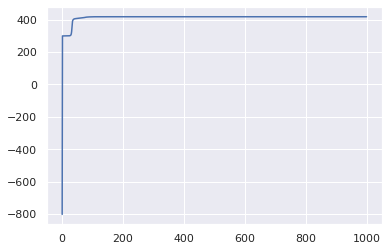

In [7]:
params = em.iteration(samples, 1000)

pi = np.array([0.2, 0.3, 0.5])

mu = np.array([[0.2, 0.5], [0.5, 0.6], [0.9, 0.8]])

Sigma = np.array([[[.01, 0], [0, .01]], [[.01, 0], [0, .01]], [[.01, 0], [0, .01]]])

In [8]:
print('pi:', params['pi'])
print('mu:', params['mu'])
print('Sigma:', params['Sigma'])

pi: [[0.29413739]
 [0.21067673]
 [0.49518588]]
mu: [[0.51660704 0.60590421]
 [0.22942072 0.51105714]
 [0.89607407 0.80449324]]
Sigma: [[[ 0.00937273  0.00038206]
  [ 0.00038206  0.00874482]]

 [[ 0.01166372  0.00204986]
  [ 0.00204986  0.01438115]]

 [[ 0.00953785 -0.00072786]
  [-0.00072786  0.01031613]]]


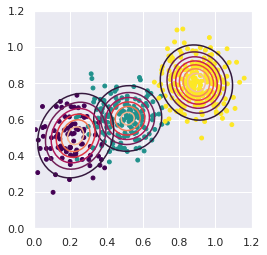

In [9]:
em.plot_2d_Gaussian_contour(params['pi'], params['mu'], params['Sigma'], samples)

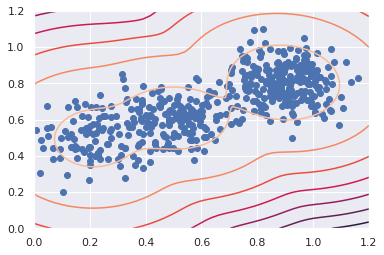

In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 3)
gmm.fit(samples)

X, Y = np.meshgrid(np.linspace(0, 1.2), np.linspace(0,1.2))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()

## Maximum Likelihood for a Mixture of Bernoullis

## Bayesian Mixture Models

The joint pdf becomes
\begin{equation}\begin{aligned}
p(\textbf{x}_{1:N}, \textbf{z}_{1:N}, \boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K}, \Sigma_{1:K}) &= p(\textbf{x}_{1:N}| \textbf{z}_{1:N}, \boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K}, \Sigma_{1:K}) \\ 
& \quad \times p(\textbf{z}_{1:N} | \boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K}, \Sigma_{1:K}) \\
& \quad \times p( \boldsymbol{\pi}_{1:K}| \boldsymbol{\mu}_{1:K}, \Sigma_{1:K})p(\boldsymbol{\mu}_{1:K}| \Sigma_{1:K})p( \Sigma_{1:K}) \\
&= p(\textbf{x}_{1:N}| \textbf{z}_{1:N}, \boldsymbol{\mu}_{1:K}, \Sigma_{1:K}) \\ 
& \quad \times p(\textbf{z}_{1:N} | \boldsymbol{\pi}_{1:K}) p( \boldsymbol{\pi}_{1:K})p(\boldsymbol{\mu}_{1:K}| \Sigma_{1:K})p( \Sigma_{1:K}) \\
&= \prod_{n=1}^N p(\textbf{x}_{n}| \textbf{z}_{n}, \boldsymbol{\mu}_{1:K}, \Sigma_{1:K})\prod_{n=1}^N p(\textbf{z}_{n} | \boldsymbol{\pi}_{1:K}) \\ 
& \quad \times p( \boldsymbol{\pi}_{1:K})p(\boldsymbol{\mu}_{1:K}| \Sigma_{1:K})p( \Sigma_{1:K}) \\
&= \prod_{n=1}^N \prod_{k=1}^K [p(\textbf{x}_{n}| \boldsymbol{\mu}_{k}, \Sigma_{k})p(\pi_k)]^{z_{nk}} p( \boldsymbol{\pi}_{1:K})p(\boldsymbol{\mu}_{1:K}| \Sigma_{1:K})p( \Sigma_{1:K}).
\end{aligned}\end{equation}